<a href="https://colab.research.google.com/github/shirley462/Artificial-Intelligence-Projects/blob/main/Building_a_Machine_Learning_Model_for_Artistic_Style_Classification_with_Java_Script_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Running Packages & Libraries (Aka Setting up the Enviorment)
from google.colab import files
import zipfile
import io
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

!pip install tensorflowjs
import tensorflowjs as tfjs

import json
from urllib.request import urlretrieve

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image
import os
import gdown

import numpy as np
import tensorflow as tf
import cv2 
from google.colab.patches import cv2_imshow



import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.2 MB/s 
     |████████████████████████████████| 197 kB 34.9 MB/s 
     |████████████████████████████████| 40 kB 6.2 MB/s 
     |████████████████████████████████| 16.2 MB 56.9 MB/s 
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 154 kB 69.4 MB/s 
     |████████████████████████████████| 8.3 MB 52.1 MB/s 
     |████████████████████████████████| 238 kB 55.8 MB/s 
     |████████████████████████████████| 66 kB 4.9 MB/s 
     |████████████████████████████████| 51 kB 7.2 MB/s 
     |████████████████████████████████| 6.0 MB 60.0 MB/s 
     |████████████████████████████████| 1.7 MB 62.9 MB/s 
     |████████████████████████████████| 439 kB 72.8 MB/s 
     |████████████████████████████████| 85 kB 4.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

def capture_image(filename): 
  try:
    take_photo(filename)
    print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

In [ ]:
#Uploading the Model
uploaded = files.upload()

Saving AI ART Model.zip to AI ART Model.zip


In [ ]:
#Extract model into colab
try:
  file_name = list(uploaded.keys())[-1]
  print("Extracting model...")
  with zipfile.ZipFile(file_name, 'r') as zip_ref:
      zip_ref.extractall('')
      
  class_names = np.genfromtxt("labels.txt", dtype="str", delimiter='\n')
  for i in range(len(class_names)):
    class_names[i] = ' '.join(class_names[i].split(' ')[1::])

  predictions = [0.0] * len(class_names)

  model = tf.keras.models.load_model('keras_model.h5', compile=False)
  print("Success! Model Extracted!")
except (IndexError, NameError):
  print("Oops! Cannot find file to unzip. Please try uploading a zip file for your model")

def get_image_classification():
  image_name = 'test.jpg'
  image = cv2.imread(image_name)
  cv2_imshow(image)
  return classify_image(image_name)['classification']

def get_image_predictions():
  return classify_image('test.jpg')['predictions']

def get_best_prediction():
  return max(get_image_predictions())

def classify_image(image_name):
  image = cv2.imread(image_name)
  image =  cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  image = cv2.resize(image,(224,224)).astype('float32')

  image = np.reshape(image,(1,224,224,3))
  image = image / 255

  predictions = model.predict(image)[0]

  pred_class = class_names[np.argmax(predictions)]

  return {'classification': pred_class, 'predictions': predictions}

Oops! Cannot find file to unzip. Please try uploading a zip file for your model


In [ ]:
#Capture Test Image
capture_image("test.jpg")

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

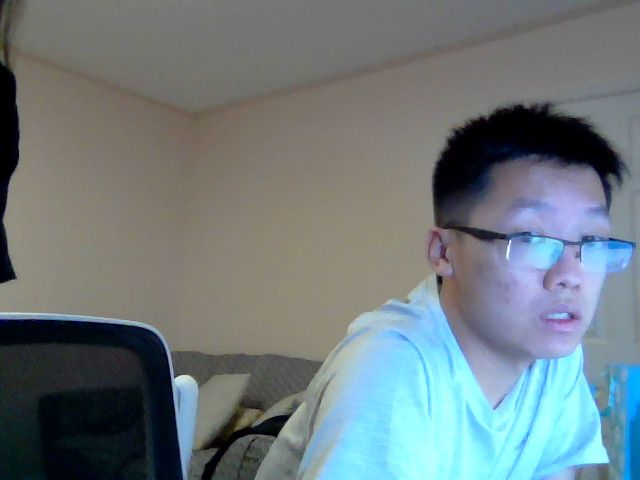

1/1 [==============================] - 0s 53ms/step
Drawings and Watercolours


In [ ]:
#Calling a function called get_image_classification() can help us see what classification our model gives us from our test image!
classification = get_image_classification()
print(classification)

In [ ]:
predictions = get_image_predictions()
print(class_names, predictions)

1/1 [==============================] - 0s 49ms/step
['Drawings and Watercolours' 'Painting' 'Sculpture' 'Engraving'] [0.21287094 0.00100877 0.00691387 0.77920645]
